<p align=center> <img src='https://resource.calcionapoli24.it/www/galleria/upload/1563696286-netflixlogo.jpg' width='700'> </p>

<h1 align='center'> Data Analysis on most viewed Netflix shows + KMEANS</h1>

<h3 align=left>
    <br> - PHASE 1 --> Preparation </br>
    <br> - PHASE 2 --> Exploratory Data Analysis - EDA </br>
</h3>

In [852]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
from sklearn.preprocessing import MultiLabelBinarizer
import re
from wordcloud import WordCloud, STOPWORDS
#%matplotlib inline
print("Libraries have been correctly imported!")

Libraries have been correctly imported!


In [853]:
#Nella scrittura del filepath ruotiamo sempre gli slash. Non dobbiamo mai avere backslash \ ma solo slash /
netflix_dataset='/Users/francescocrovella/Desktop/Entertainment/Netflix_titles.csv'
netflix_df=pd.read_csv(netflix_dataset)

print("The dataset has been correctly imported!")

netflix_df.head(2)

The dataset has been correctly imported!


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [854]:
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

<h1 align=center> PHASE 1/2 </h3>
<h1 align=center> DATA CLEANING & PREPROCESSING </h3>

##### These are the most important basic information methods for a dataset:
- df.shape ---> number of rows and columns
- df.columns ---> columns array
- df.count() ---> number of records
- df.info() ---> different file info, including dtypes
- df.drop_duplicates()
- df.describe()
- df.nunique()


- GESTIONE COLONNE NON NECESSARIE
- df.drop(["columnName"],axis=1,inplace=True)


- GESTIONE MISSING VALUES
- df.isna().sum(axis=0) --- calcolo delle celle nulle per ogni colonna


- GESTIONE FORMATO DATA

In [855]:
netflix_df.shape

(8807, 12)

In [856]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [857]:
netflix_df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [858]:
#si capisce che alcune colonne hanno delle celle vuote. Capiamo qual è l'index massimo

In [859]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [860]:
#poichè l'index massimo è di 8807 dobbiamo capire cosa fare con le celle vuote

In [861]:
#facciamo droppare eventuali duplicati
netflix_df.drop_duplicates()
print('duplicates dropped')

duplicates dropped


In [862]:
netflix_df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [863]:
#we need to cast date_added column since noy is an object type and should be a datatime
#pandas uses this format yyyy-mm-dd
netflix_df[['date_added']]=netflix_df[['date_added']].apply(pd.to_datetime)
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [864]:
print(netflix_df['date_added'].dtype)

datetime64[ns]


In [865]:
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [866]:
#Capiamo se ci sono colonne inutili da eliminare
netflix_df.drop(['show_id'],axis=1,inplace=True)

In [867]:
#capiamo se ci sono celle nulle per ogni colonna
netflix_df.isna().sum(axis=0)

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### capiamo come gestire le celle nulle
### visto che negli show non ci sono celle nulle, allora non possiamo eliminare nessuna riga ma dobbiamo fare delle sostituzioni

- colonna director   --------> filliamo con "Unknown"
- colonna cast       --------> filliamo con "Unknown"
- colonna country    --------> filliamo con "Unknown"
- colonna date_added --------> inseriamo la DUMMY DATE ---> 1 gennaio 1900
- colonna rating     --------> filliamo con "Unknown"
- colonna duration   --------> filliamo con "Unknown"

In [868]:
empty_columns_tobefilled_unknown=['director','cast','country','rating','duration']

for i in netflix_df[empty_columns_tobefilled_unknown]:
    netflix_df[i]= netflix_df[i].fillna('Unknown')

netflix_df['date_added'].fillna(pd.Timestamp('1900-01-01'), inplace=True)

#controlliamo che se ricalcoliamo i valori nulli compaia tutto zero
netflix_df.isna().sum(axis=0)

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [869]:
netflix_df.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


<h1 align=center> PHASE 2/2 </h3>
<h1 align=center> EXPLORATORY DATA ANALYSIS - EDA </h3>

EDA is compoused by 2 sub sections:
- feature characteristics analysis
- relationships analysis

FEATURE CHRACTERISTICS ANALYSIS

- Is the feature categorical or numerical?
- Is the feature continuous or discrete?
- How many unique values does the feature have?
- What are the minimum and maximum values?
- What are the most and least common values?
- What is the overall distribution of the feature?
- Are there any implausible datapoints? Are these outliers or mislabelled datapoint?

- df['columns'].value_counts()
- COUNTPLOT --> grafico a barre categorico non numerico
- BARPLOT --> grafico a barre
- HEATMAP --> matrice di correlazione colorata
- HISTPLOT --> istrogramma per distribuzioni
- WORDCLOUD --> genera una nuvola con le cose più diffuse nella colonna

In [870]:
#capiamo come suddivide netflix i suoi prodotti nella colonna "type"
netflix_df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

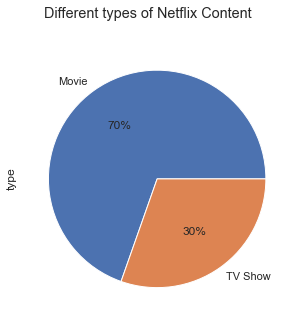

In [871]:
plt.figure(figsize=(10,5))

netflix_df['type'].value_counts().plot(kind='pie',autopct="%.0f%%")

plt.suptitle('Different types of Netflix Content')
plt.show()

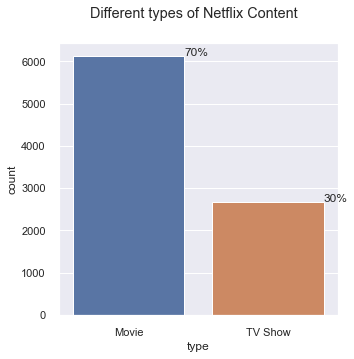

In [872]:
#plottiamo le evidenze della distribuzione dei prodotti con un COUNTPLOT

sns.set(style='darkgrid')

plt.figure(figsize=(5,5))

ax=sns.countplot(x='type',data=netflix_df)


# calcolo delle percentuali

total = float(len(netflix_df))

for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x=p.get_x()+p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y))

plt.suptitle('Different types of Netflix Content')

plt.show()

In [873]:
#capiamo che il 70% dei prodotti netflix è FILM mentre le serie sono solamente il 30%. Avrei detto esattamente il contrario



In [874]:
#conteggio di quanti record ci sono per ogni colonna

#ANALISI DEI RATING
netflix_df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
Unknown        4
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [875]:
#da sopra si capisce che dei rating su 8k valori non sono significativi
#dal sito di netfli x 'https://help.netflix.com/it/node/2064/us' è possibile capire quali sono gli 11 rating permessi un USA
#DROPPIAMO nel df in questo senso

rating_tobeConsidered=['TV-Y','TV-Y7','G','TV-G','PG','TV-PG','PG-13','TV-14','R','TV-MA','NC-17']

netflix_df=netflix_df[netflix_df['rating'].isin(rating_tobeConsidered)]


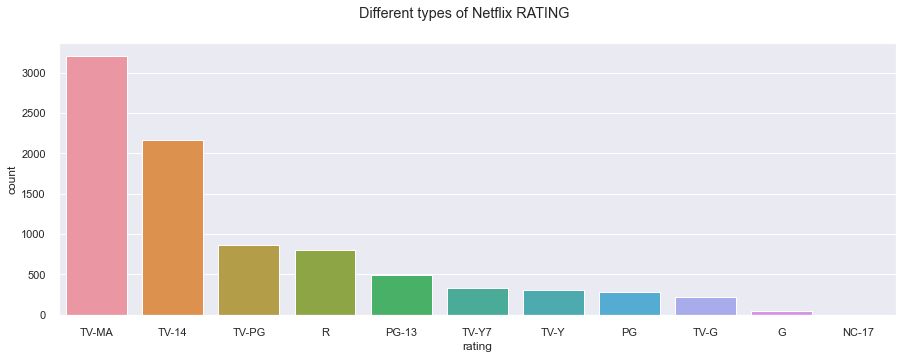

In [876]:
#plottiamo le evidenze della distribuzione dei rating con un COUNTPLOT
fig=plt.figure(figsize=(15,5))
sns.countplot(x=netflix_df['rating'],order=netflix_df['rating'].value_counts().index)
plt.suptitle('Different types of Netflix RATING')
plt.show()

# Insights dal grafico precedente:
- la categoria più diffusa su Netflix è TV-MA, poi TV-14 E TV-PG. In generale Netflix non lascia principalmente spazio a bambini quindi è una piattaforma per adulti principalmente da 14 anni in su

In [877]:
rating_dataset='/Users/francescocrovella/Desktop/Entertainment/Netflix_Shows.csv'
rating_df=pd.read_csv(rating_dataset,encoding='latin-1')
rating_df.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [878]:
rating_df.drop(['title','ratingDescription','release year','user rating score','user rating size'],axis=1,inplace=True)
#facciamo droppare eventuali duplicati
rating_df.drop_duplicates()
print('duplicates dropped')
rating_df

duplicates dropped


,rating,ratingLevel
0,PG-13,"crude and sexual humor, language and some drug..."
1,R,"strong violence, sexual content and adult lang..."
2,TV-14,Parents strongly cautioned. May be unsuitable ...
3,TV-14,Parents strongly cautioned. May be unsuitable ...
4,TV-PG,Parental guidance suggested. May not be suitab...
...,...,...
995,PG,"for action/peril, some scary moments and brief..."
996,PG,for action and some rude humor
997,TV-G,Suitable for all ages.
998,TV-G,Suitable for all ages.


In [879]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rating       1000 non-null   object
 1   ratingLevel  941 non-null    object
dtypes: object(2)
memory usage: 15.8+ KB


In [880]:
rating_df.dropna(subset=['ratingLevel'],inplace=True)
rating_df.dropna(subset=['rating'],inplace=True)

rating_df.head()

,rating,ratingLevel
0,PG-13,"crude and sexual humor, language and some drug..."
1,R,"strong violence, sexual content and adult lang..."
2,TV-14,Parents strongly cautioned. May be unsuitable ...
3,TV-14,Parents strongly cautioned. May be unsuitable ...
4,TV-PG,Parental guidance suggested. May not be suitab...


In [881]:
#controlliamo che se ricalcoliamo i valori nulli compaia tutto zero
rating_df.isna().sum(axis=0)

rating         0
ratingLevel    0
dtype: int64

In [882]:
rating_df['rating'].value_counts()

TV-14       225
PG          170
G           134
TV-MA       110
TV-Y         68
TV-PG        54
TV-G         52
TV-Y7-FV     44
TV-Y7        38
R            19
PG-13        15
NR           11
UR            1
Name: rating, dtype: int64

In [883]:
rating_df.isna().sum(axis=0)

rating         0
ratingLevel    0
dtype: int64

In [884]:
rating_df.dropna(axis=0,how='any',thresh=None,subset=None,inplace=True)

In [885]:
rating_df.isna().sum(axis=0)

rating         0
ratingLevel    0
dtype: int64

In [886]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941 entries, 0 to 998
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rating       941 non-null    object
 1   ratingLevel  941 non-null    object
dtypes: object(2)
memory usage: 22.1+ KB


In [887]:
rating_df['rating'].value_counts()

TV-14       225
PG          170
G           134
TV-MA       110
TV-Y         68
TV-PG        54
TV-G         52
TV-Y7-FV     44
TV-Y7        38
R            19
PG-13        15
NR           11
UR            1
Name: rating, dtype: int64

In [888]:
#netflix_df_r=pd.concat([netflix_df,rating_df],axis=1,join='inner')
netflix_df_r=netflix_df.combine_first(rating_df)
netflix_df_r

,cast,country,date_added,description,director,duration,listed_in,rating,ratingLevel,release_year,title,type
0,Unknown,United States,2021-09-25,"As her father nears the end of his life, filmm...",Kirsten Johnson,90 min,Documentaries,PG-13,"crude and sexual humor, language and some drug...",2020,Dick Johnson Is Dead,Movie
1,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,"After crossing paths at a party, a Cape Town t...",Unknown,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",TV-MA,"strong violence, sexual content and adult lang...",2021,Blood & Water,TV Show
2,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,To protect his family from a powerful drug lor...,Julien Leclercq,1 Season,"Crime TV Shows, International TV Shows, TV Act...",TV-MA,Parents strongly cautioned. May be unsuitable ...,2021,Ganglands,TV Show
3,Unknown,Unknown,2021-09-24,"Feuds, flirtations and toilet talk go down amo...",Unknown,1 Season,"Docuseries, Reality TV",TV-MA,Parents strongly cautioned. May be unsuitable ...,2021,Jailbirds New Orleans,TV Show
4,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,In a city of coaching centers known to train I...,Unknown,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",TV-MA,Parental guidance suggested. May not be suitab...,2021,Kota Factory,TV Show
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,"A political cartoonist, a crime reporter and a...",David Fincher,158 min,"Cult Movies, Dramas, Thrillers",R,NaN,2007,Zodiac,Movie
8803,Unknown,Unknown,2019-07-01,"While living alone in a spooky town, a young g...",Unknown,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",TV-Y7,NaN,2018,Zombie Dumb,TV Show
8804,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,Looking to survive in a world taken over by zo...,Ruben Fleischer,88 min,"Comedies, Horror Movies",R,NaN,2009,Zombieland,Movie
8805,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,"Dragged from civilian life, a former superhero...",Peter Hewitt,88 min,"Children & Family Movies, Comedies",PG,NaN,2006,Zoom,Movie


In [889]:
netflix_df_r.drop(['description'],axis=1,inplace=True)
#facciamo droppare eventuali duplicati
netflix_df_r.drop_duplicates()
print('duplicates dropped')
netflix_df_r

duplicates dropped


,cast,country,date_added,director,duration,listed_in,rating,ratingLevel,release_year,title,type
0,Unknown,United States,2021-09-25,Kirsten Johnson,90 min,Documentaries,PG-13,"crude and sexual humor, language and some drug...",2020,Dick Johnson Is Dead,Movie
1,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,Unknown,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",TV-MA,"strong violence, sexual content and adult lang...",2021,Blood & Water,TV Show
2,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,Julien Leclercq,1 Season,"Crime TV Shows, International TV Shows, TV Act...",TV-MA,Parents strongly cautioned. May be unsuitable ...,2021,Ganglands,TV Show
3,Unknown,Unknown,2021-09-24,Unknown,1 Season,"Docuseries, Reality TV",TV-MA,Parents strongly cautioned. May be unsuitable ...,2021,Jailbirds New Orleans,TV Show
4,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,Unknown,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",TV-MA,Parental guidance suggested. May not be suitab...,2021,Kota Factory,TV Show
...,...,...,...,...,...,...,...,...,...,...,...
8802,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,David Fincher,158 min,"Cult Movies, Dramas, Thrillers",R,NaN,2007,Zodiac,Movie
8803,Unknown,Unknown,2019-07-01,Unknown,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",TV-Y7,NaN,2018,Zombie Dumb,TV Show
8804,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,Ruben Fleischer,88 min,"Comedies, Horror Movies",R,NaN,2009,Zombieland,Movie
8805,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,Peter Hewitt,88 min,"Children & Family Movies, Comedies",PG,NaN,2006,Zoom,Movie


In [890]:
netflix_df_r.shape

(8711, 11)

In [891]:
netflix_df_r.isna().sum(axis=0)

cast               0
country            0
date_added         0
director           0
duration           0
listed_in          0
rating             0
ratingLevel     7770
release_year       0
title              0
type               0
dtype: int64

In [892]:
netflix_df_r['ratingLevel'].fillna('Unknown', inplace=True)

In [893]:
netflix_df_r.isna().sum(axis=0)

cast            0
country         0
date_added      0
director        0
duration        0
listed_in       0
rating          0
ratingLevel     0
release_year    0
title           0
type            0
dtype: int64

In [894]:
netflix_df_r.shape

(8711, 11)

In [895]:
netflix_df_r

,cast,country,date_added,director,duration,listed_in,rating,ratingLevel,release_year,title,type
0,Unknown,United States,2021-09-25,Kirsten Johnson,90 min,Documentaries,PG-13,"crude and sexual humor, language and some drug...",2020,Dick Johnson Is Dead,Movie
1,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,Unknown,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",TV-MA,"strong violence, sexual content and adult lang...",2021,Blood & Water,TV Show
2,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,Julien Leclercq,1 Season,"Crime TV Shows, International TV Shows, TV Act...",TV-MA,Parents strongly cautioned. May be unsuitable ...,2021,Ganglands,TV Show
3,Unknown,Unknown,2021-09-24,Unknown,1 Season,"Docuseries, Reality TV",TV-MA,Parents strongly cautioned. May be unsuitable ...,2021,Jailbirds New Orleans,TV Show
4,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,Unknown,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",TV-MA,Parental guidance suggested. May not be suitab...,2021,Kota Factory,TV Show
...,...,...,...,...,...,...,...,...,...,...,...
8802,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,David Fincher,158 min,"Cult Movies, Dramas, Thrillers",R,Unknown,2007,Zodiac,Movie
8803,Unknown,Unknown,2019-07-01,Unknown,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",TV-Y7,Unknown,2018,Zombie Dumb,TV Show
8804,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,Ruben Fleischer,88 min,"Comedies, Horror Movies",R,Unknown,2009,Zombieland,Movie
8805,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,Peter Hewitt,88 min,"Children & Family Movies, Comedies",PG,Unknown,2006,Zoom,Movie


<h1 align='center'> <b> ANALISI DEI CONTENUTI PIU' DIFFUSI SU NETFLIX  </b> </h1>

## METODO 1 --> SPLITTING COLUMNS

In [896]:
listed_in_count=netflix_df.copy()
listed_in_count=pd.concat([listed_in_count,netflix_df['listed_in'].str.split(",",expand=True)],axis=1)
listed_in_count

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,0,1,2
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries,None,None
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",International TV Shows,TV Dramas,TV Mysteries
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Crime TV Shows,International TV Shows,TV Action & Adventure
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Docuseries,Reality TV,None
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Cult Movies,Dramas,Thrillers
8803,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Kids' TV,Korean TV Shows,TV Comedies
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Comedies,Horror Movies,None
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Children & Family Movies,Comedies,None


In [897]:
listed_in_count=listed_in_count.melt(id_vars=['type','title'],value_vars=range(3),value_name='listed_in')
listed_in_count=listed_in_count[listed_in_count['listed_in'].notna()]
listed_in_count

/var/folders/r9/mhcm3_q10yq7wy82r6vvs23r0000gn/T/ipykernel_6251/476958721.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  listed_in_count=listed_in_count.melt(id_vars=['type','title'],value_vars=range(3),value_name='listed_in')


,type,title,variable,listed_in
0,Movie,Dick Johnson Is Dead,0,Documentaries
1,TV Show,Blood & Water,0,International TV Shows
2,TV Show,Ganglands,0,Crime TV Shows
3,TV Show,Jailbirds New Orleans,0,Docuseries
4,TV Show,Kota Factory,0,International TV Shows
...,...,...,...,...
26126,TV Show,Zindagi Gulzar Hai,2,TV Dramas
26127,Movie,Zinzana,2,Thrillers
26128,Movie,Zodiac,2,Thrillers
26129,TV Show,Zombie Dumb,2,TV Comedies


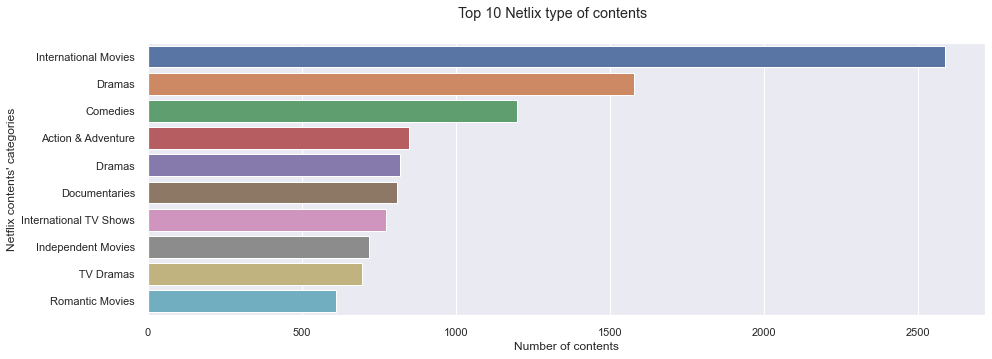

In [898]:
plt.figure(figsize=(15,5))
listed_in=listed_in_count['listed_in'].value_counts()[:10]
sns.barplot(x=listed_in,y=listed_in.index)
plt.suptitle('Top 10 Netlix type of contents')
plt.xlabel('Number of contents')
plt.ylabel('Netflix contents\' categories')
plt.show()

# METODO 2= usando sklearn -- MultiLableBinarizer
# metodo inutilmente lungo e poco elegante

In [899]:
#così come sono i dati non si riesce a capire il tipo di categoria più diffusa su netflix
#usiamo MULTILABELBINARIZER per splittare le stringhe in n colonne

In [900]:
columns_tobeSplitted=['listed_in']
SPLITTER=MultiLabelBinarizer()

for stringToBeSplitted in columns_tobeSplitted:
    netflix_df_r[stringToBeSplitted]=netflix_df_r[stringToBeSplitted].apply(lambda x: x.split(", "))
    netflix_df_r=netflix_df_r.join(pd.DataFrame(SPLITTER.fit_transform(netflix_df_r[stringToBeSplitted]),columns= [f"{stringToBeSplitted}_{re.sub(' ', '', c)}" for c in SPLITTER.classes_]))

netflix_df_r.drop(columns_tobeSplitted, axis=1, inplace=True)
netflix_df_r.head()


,cast,country,date_added,director,duration,rating,ratingLevel,release_year,title,type,...,listed_in_TVAction&Adventure,listed_in_TVComedies,listed_in_TVDramas,listed_in_TVHorror,listed_in_TVMysteries,listed_in_TVSci-Fi&Fantasy,listed_in_TVShows,listed_in_TVThrillers,listed_in_TeenTVShows,listed_in_Thrillers
0,Unknown,United States,2021-09-25,Kirsten Johnson,90 min,PG-13,"crude and sexual humor, language and some drug...",2020,Dick Johnson Is Dead,Movie,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,Unknown,2 Seasons,TV-MA,"strong violence, sexual content and adult lang...",2021,Blood & Water,TV Show,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,Julien Leclercq,1 Season,TV-MA,Parents strongly cautioned. May be unsuitable ...,2021,Ganglands,TV Show,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Unknown,Unknown,2021-09-24,Unknown,1 Season,TV-MA,Parents strongly cautioned. May be unsuitable ...,2021,Jailbirds New Orleans,TV Show,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,Unknown,2 Seasons,TV-MA,Parental guidance suggested. May not be suitab...,2021,Kota Factory,TV Show,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [901]:
netflix_df_r.columns

Index(['cast', 'country', 'date_added', 'director', 'duration', 'rating',
       'ratingLevel', 'release_year', 'title', 'type',
       'listed_in_Action&Adventure', 'listed_in_AnimeFeatures',
       'listed_in_AnimeSeries', 'listed_in_BritishTVShows',
       'listed_in_Children&FamilyMovies', 'listed_in_Classic&CultTV',
       'listed_in_ClassicMovies', 'listed_in_Comedies',
       'listed_in_CrimeTVShows', 'listed_in_CultMovies',
       'listed_in_Documentaries', 'listed_in_Docuseries', 'listed_in_Dramas',
       'listed_in_Faith&Spirituality', 'listed_in_HorrorMovies',
       'listed_in_IndependentMovies', 'listed_in_InternationalMovies',
       'listed_in_InternationalTVShows', 'listed_in_Kids'TV',
       'listed_in_KoreanTVShows', 'listed_in_LGBTQMovies', 'listed_in_Movies',
       'listed_in_Music&Musicals', 'listed_in_RealityTV',
       'listed_in_RomanticMovies', 'listed_in_RomanticTVShows',
       'listed_in_Sci-Fi&Fantasy', 'listed_in_Science&NatureTV',
       'listed_in_Span

In [902]:
netflix_df_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8711 entries, 0 to 8806
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   cast                                8711 non-null   object        
 1   country                             8711 non-null   object        
 2   date_added                          8711 non-null   datetime64[ns]
 3   director                            8711 non-null   object        
 4   duration                            8711 non-null   object        
 5   rating                              8711 non-null   object        
 6   ratingLevel                         8711 non-null   object        
 7   release_year                        8711 non-null   int64         
 8   title                               8711 non-null   object        
 9   type                                8711 non-null   object        
 10  listed_in_Action&Adventu

In [903]:
netflix_df_r_1=netflix_df_r.iloc[:,np.r_[10:51]].dropna().apply(np.int64)
netflix_df_r_1

,listed_in_Action&Adventure,listed_in_AnimeFeatures,listed_in_AnimeSeries,listed_in_BritishTVShows,listed_in_Children&FamilyMovies,listed_in_Classic&CultTV,listed_in_ClassicMovies,listed_in_Comedies,listed_in_CrimeTVShows,listed_in_CultMovies,...,listed_in_Stand-UpComedy&TalkShows,listed_in_TVAction&Adventure,listed_in_TVComedies,listed_in_TVDramas,listed_in_TVHorror,listed_in_TVMysteries,listed_in_TVSci-Fi&Fantasy,listed_in_TVShows,listed_in_TVThrillers,listed_in_TeenTVShows
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8706,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8707,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8708,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8709,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [904]:
netflix_df_r_1.dropna()

,listed_in_Action&Adventure,listed_in_AnimeFeatures,listed_in_AnimeSeries,listed_in_BritishTVShows,listed_in_Children&FamilyMovies,listed_in_Classic&CultTV,listed_in_ClassicMovies,listed_in_Comedies,listed_in_CrimeTVShows,listed_in_CultMovies,...,listed_in_Stand-UpComedy&TalkShows,listed_in_TVAction&Adventure,listed_in_TVComedies,listed_in_TVDramas,listed_in_TVHorror,listed_in_TVMysteries,listed_in_TVSci-Fi&Fantasy,listed_in_TVShows,listed_in_TVThrillers,listed_in_TeenTVShows
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8706,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8707,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8708,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8709,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [905]:
netflix_df_r_1.columns=netflix_df_r_1.columns.str.replace('listed_in','')

In [906]:
netflix_df_r_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8619 entries, 0 to 8710
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   _Action&Adventure          8619 non-null   int64
 1   _AnimeFeatures             8619 non-null   int64
 2   _AnimeSeries               8619 non-null   int64
 3   _BritishTVShows            8619 non-null   int64
 4   _Children&FamilyMovies     8619 non-null   int64
 5   _Classic&CultTV            8619 non-null   int64
 6   _ClassicMovies             8619 non-null   int64
 7   _Comedies                  8619 non-null   int64
 8   _CrimeTVShows              8619 non-null   int64
 9   _CultMovies                8619 non-null   int64
 10  _Documentaries             8619 non-null   int64
 11  _Docuseries                8619 non-null   int64
 12  _Dramas                    8619 non-null   int64
 13  _Faith&Spirituality        8619 non-null   int64
 14  _HorrorMovies           

In [907]:
netflix_df_r_1[netflix_df_r_1.columns[netflix_df_r_1.columns.str.startswith('_')]].sum(axis=0).sort_values(ascending=False)
temp=netflix_df_r_1[netflix_df_r_1.columns[netflix_df_r_1.columns.str.startswith('_')]].sum(axis=1)

Ora abbiamo compreso che le prime 5 categorie di Netflix sono le seguenti:
- International Movies
- Dramas                      
- Comedies                    
- International TV Shows        
- Action & Adventure   

<h1 align='center'> <b> ANALISI TEMPORALE SUGLI UPLOAD DI CONTENUTI DA PARTE DI NETFLIX </b> </h1>

In [908]:
netflix_df_r['day']=netflix_df_r['date_added'].apply(lambda x: x.day)
#netflix_df_r['hour']=netflix_df_r['date_added'].apply(lambda x: x.hour)
netflix_df_r['weekday']=netflix_df_r['date_added'].apply(lambda x: x.weekday())

netflix_df_r.head(2)

,cast,country,date_added,director,duration,rating,ratingLevel,release_year,title,type,...,listed_in_TVDramas,listed_in_TVHorror,listed_in_TVMysteries,listed_in_TVSci-Fi&Fantasy,listed_in_TVShows,listed_in_TVThrillers,listed_in_TeenTVShows,listed_in_Thrillers,day,weekday
0,Unknown,United States,2021-09-25,Kirsten Johnson,90 min,PG-13,"crude and sexual humor, language and some drug...",2020,Dick Johnson Is Dead,Movie,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25,5
1,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,Unknown,2 Seasons,TV-MA,"strong violence, sexual content and adult lang...",2021,Blood & Water,TV Show,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,24,4


In [909]:
netflix_df_r['weekday']=netflix_df_r['weekday'].apply(str)
netflix_df_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8711 entries, 0 to 8806
Data columns (total 54 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   cast                                8711 non-null   object        
 1   country                             8711 non-null   object        
 2   date_added                          8711 non-null   datetime64[ns]
 3   director                            8711 non-null   object        
 4   duration                            8711 non-null   object        
 5   rating                              8711 non-null   object        
 6   ratingLevel                         8711 non-null   object        
 7   release_year                        8711 non-null   int64         
 8   title                               8711 non-null   object        
 9   type                                8711 non-null   object        
 10  listed_in_Action&Adventu

In [910]:
netflix_df_r['weekday'].replace(['0','1','2','3','4','5','6'],['Monday','Thuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],inplace=True)

In [911]:
netflix_df_r['weekday'].value_counts()

Friday       2477
Thursday     1382
Wednesday    1278
Thuesday     1189
Monday        843
Saturday      800
Sunday        742
Name: weekday, dtype: int64

In [912]:
netflix_df_r['weekday'].head()

0    Saturday
1      Friday
2      Friday
3      Friday
4      Friday
Name: weekday, dtype: object

Text(0, 0.5, 'Density of contents')

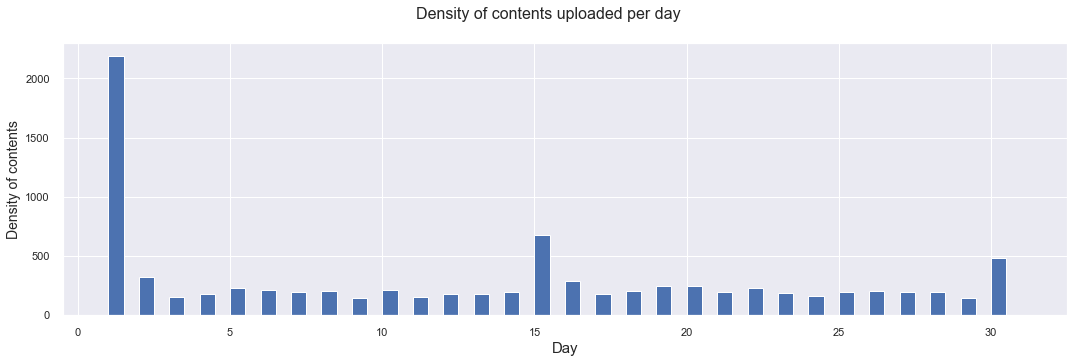

In [913]:
#Visualize the Density of contents per Day of month
fig,ax = plt.subplots(figsize = (18,5))
plt.hist(netflix_df_r['day'], width= 0.5, bins= 30)
plt.suptitle("Density of contents uploaded per day", fontsize=16)
plt.xlabel("Day", fontsize=15)
plt.ylabel("Density of contents", fontsize=14)

Text(0, 0.5, 'Density of contents')

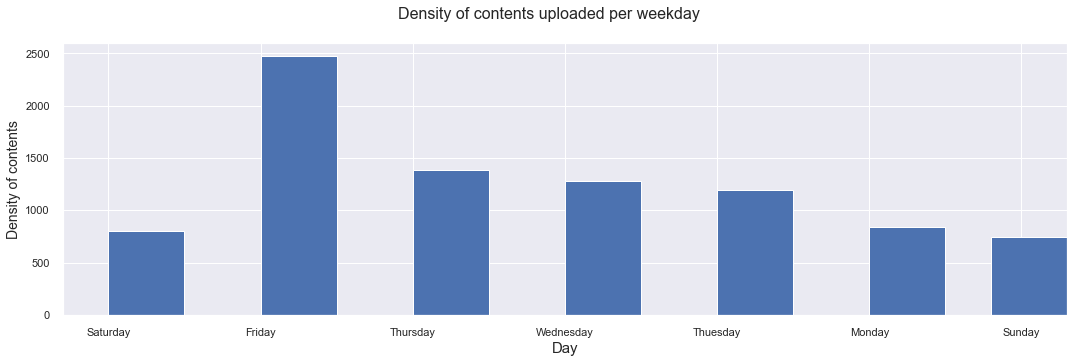

In [914]:
#Visualize the Density of contents per Day of month
fig,ax = plt.subplots(figsize = (18,5))
plt.hist(netflix_df_r['weekday'], width= 0.5, bins= 30)
plt.suptitle("Density of contents uploaded per weekday", fontsize=16)
plt.xlabel("Day", fontsize=15)
plt.ylabel("Density of contents", fontsize=14)

# Capiamo che Netflix effettua gli upload dei contenuti principalmente:
- i primi giorni del mese
- a metà mese
- alla fine del mese
- principalmente il venerdì (e anche il giovedì). probabilmente per l'avvicinarsi del weekend e il fatto che la gente ha più tempo per le maratone

# CREAZIONE DEL "WORDCLOUD"

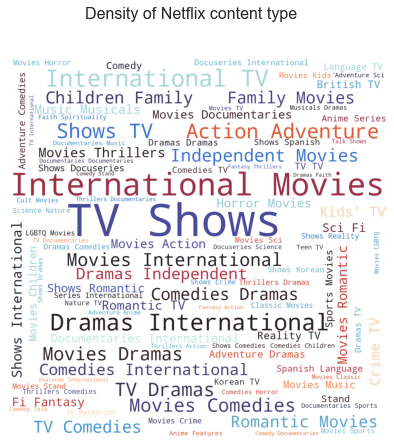

In [915]:
text=' '.join(netflix_df['listed_in'])
plt.rcParams['figure.figsize'] = (7,7)
wordcloud=WordCloud(background_color='white',colormap='icefire',width=1200,height=1200,max_words=100).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.suptitle("Density of Netflix content type", fontsize=16)
plt.show()

## Capiamo che principalmente Netflix distribuisce serie TV internazionali (extra USA)

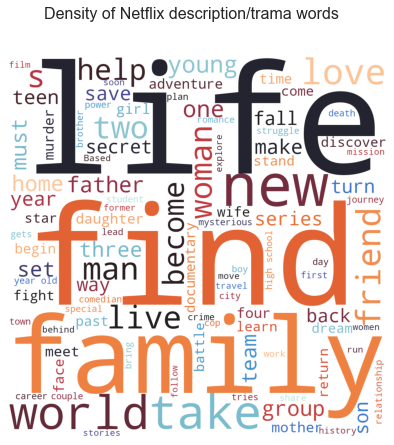

In [916]:
text=' '.join(netflix_df['description'])
plt.rcParams['figure.figsize'] = (7,7)
wordcloud=WordCloud(background_color='white',colormap='icefire',width=1200,height=1200,max_words=100).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.suptitle("Density of Netflix description/trama words", fontsize=16)
plt.show()

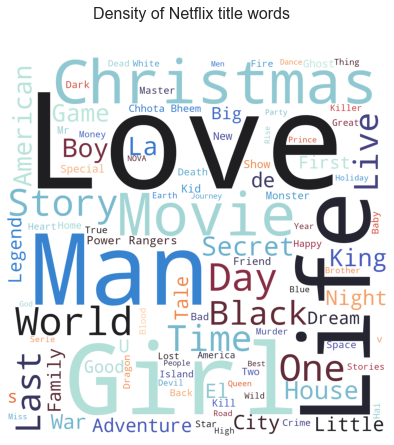

In [917]:
text=' '.join(netflix_df['title'])
plt.rcParams['figure.figsize'] = (7,7)
wordcloud=WordCloud(background_color='white',colormap='icefire',width=1200,height=1200,max_words=100).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.suptitle("Density of Netflix title words", fontsize=16)
plt.show()

## Capiamo che in Netflix

le 3 tematiche più affrontate sono le seguenti:
- life
- family
- find

i 4 termini più usati nei titoli sono i seguenti:
- life
- love
- girl
- man

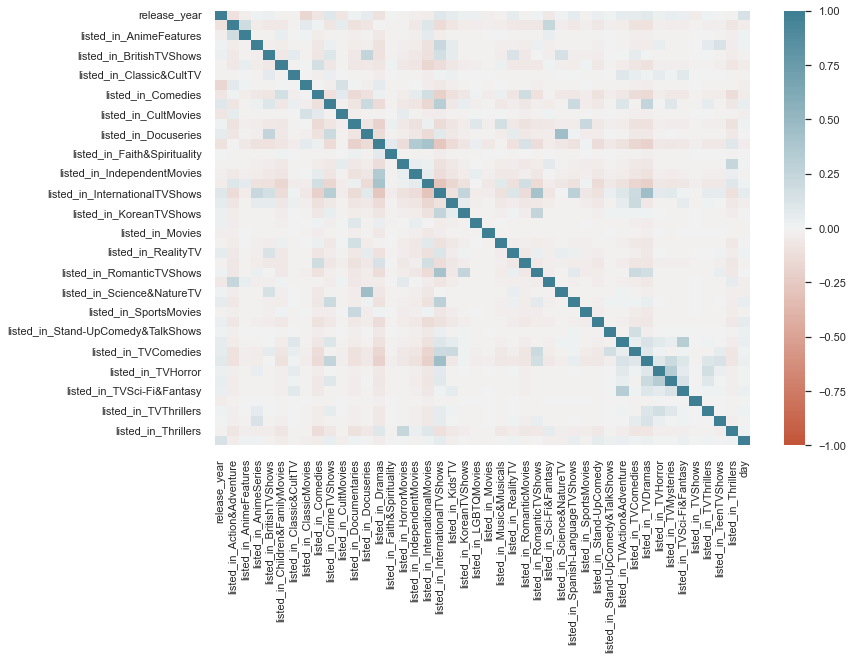

In [918]:
fig,ax = plt.subplots(figsize=(12, 8))
corr=netflix_df_r.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

#QUESTO GRAFICO DI CORR NON HA FATTO RISULTARE NULLA DI UTILE

## Which TV series has the biggest number of Seasons?

In [919]:
netflix_tvdrama=netflix_df[['title','duration','type']]
netflix_tvdrama.head()

,title,duration,type
0,Dick Johnson Is Dead,90 min,Movie
1,Blood & Water,2 Seasons,TV Show
2,Ganglands,1 Season,TV Show
3,Jailbirds New Orleans,1 Season,TV Show
4,Kota Factory,2 Seasons,TV Show


In [920]:
netflix_tvdrama=netflix_tvdrama[netflix_tvdrama['type']!='Movie']


In [921]:
netflix_tvdrama.head()

,title,duration,type
1,Blood & Water,2 Seasons,TV Show
2,Ganglands,1 Season,TV Show
3,Jailbirds New Orleans,1 Season,TV Show
4,Kota Factory,2 Seasons,TV Show
5,Midnight Mass,1 Season,TV Show


In [922]:
netflix_tvdrama['type'].value_counts()

TV Show    2668
Name: type, dtype: int64

In [923]:
tvDrama=netflix_tvdrama.copy()

tvDrama=tvDrama[['title','duration']]
tvDrama.head()


tvDrama['duration']=tvDrama['duration'].str.replace(' Season','')


tvDrama['duration']=tvDrama['duration'].str.replace('s','')

tvDrama['duration']=tvDrama['duration'].astype(str).astype(int)



tvDrama.info()
tvDrama.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2668 entries, 1 to 8803
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     2668 non-null   object
 1   duration  2668 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 62.5+ KB


,title,duration
1,Blood & Water,2
2,Ganglands,1
3,Jailbirds New Orleans,1
4,Kota Factory,2
5,Midnight Mass,1


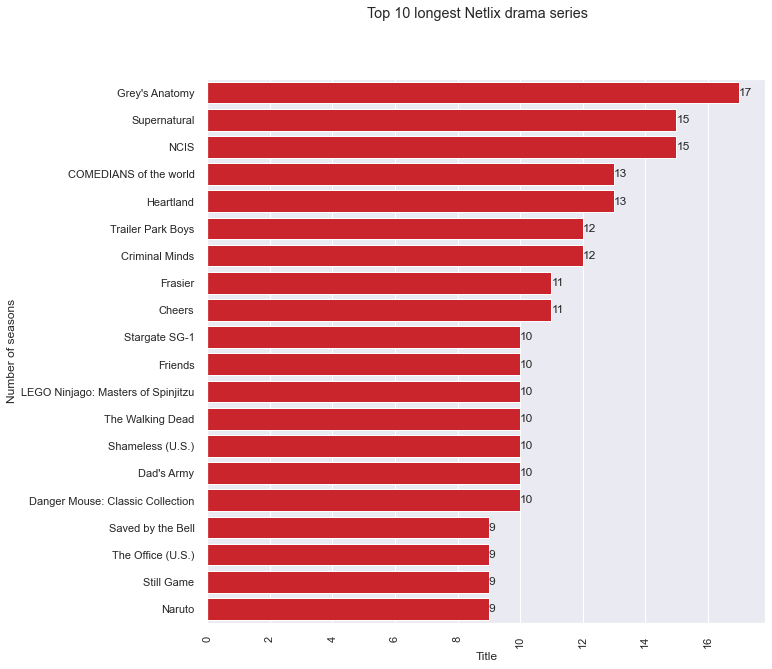

In [924]:
#Top 10 longest Netlix drama series --> seaborn barplot

top10_tvDrama=tvDrama[['title','duration']]
top10_tvDrama=top10_tvDrama.sort_values(by='duration',ascending=False)[0:20]

plt.figure(figsize=(10,10))

barplot=sns.barplot(x='duration',y='title',data=top10_tvDrama,color='#E50914')

plt.xticks(rotation=90)
plt.suptitle('Top 10 longest Netlix drama series')
plt.xlabel('Title')
plt.ylabel('Number of seasons')

plt.bar_label(barplot.containers[0])

plt.show()

# SISTEMA DI RACCOMANDAZIONE BASATO SUI LIKE E SULLA CORRELAZIONE DI
- TYPE
- COUNTRY
- LISTED_IN / CATEGORY

### COSTRUZIONE DI UNA FUNZIONE CHE RESTITUISCE UN ELENCO DI RACCOMANDAZIONI SULLA BASE DI UN LIKE ARBITRARIO

In [925]:
netflix_df.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [926]:
netflix_df.set_index('title',inplace=True)

In [927]:
def reccomendation(like):

    try:
        type=netflix_df.loc[like,'type']
        country=netflix_df.loc[like,'country']
        genere=netflix_df.loc[like,'listed_in']
        #rating=netflix_df.loc[like,'rating']

        request_1=netflix_df[netflix_df['country']==country]
        request_2=request_1[request_1['listed_in']==genere]
        request_3=request_2[request_2['type']==type]
        #request_4=request_3[request_3['rating']==rating]

        reccomendation_list_complete=(request_3.index.tolist())

        list_number_ofElements=len(reccomendation_list_complete)-1

        if list_number_ofElements >0:
            reccomendation_list=(reccomendation_list_complete[0:5])
            reccomendation_list.remove(like)
            reccomendation_list_toBullet=('\n\u2022'.join(reccomendation_list))
            reccomendation_comment=('\nNoi ti consigliamo di guardare anche: \n')
            print(reccomendation_comment + '\n\u2022' + reccomendation_list_toBullet)
        else:
            print('\nCi dispiace ma nella nostra lista non abbiamo nulla da consigliarti per il momento!')

    except:
        print('\nCi dispiace ma nel nostro catalogo non è presente questo contenuto!')


In [928]:
like= str(input("Inserisci una serie TV o film che hai già visto: "))

OurReccomendation=reccomendation(like)

#alternative method instead of interactive input
#like='Grey\'s Anatomy'


Ci dispiace ma nel nostro catalogo non è presente questo contenuto!


# K-MEANS CLUSTERING

In [929]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from yellowbrick.cluster import KElbowVisualizer


In [930]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8711 entries, Dick Johnson Is Dead to Zubaan
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8711 non-null   object        
 1   director      8711 non-null   object        
 2   cast          8711 non-null   object        
 3   country       8711 non-null   object        
 4   date_added    8711 non-null   datetime64[ns]
 5   release_year  8711 non-null   int64         
 6   rating        8711 non-null   object        
 7   duration      8711 non-null   object        
 8   listed_in     8711 non-null   object        
 9   description   8711 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 1006.6+ KB


In [931]:
netflix_df=pd.read_csv(netflix_dataset)

netflix_df.head()

netflix_df['type'].replace(['Movie','TV Show'],[1,2],inplace=True)
netflix_df_r['release_year']=netflix_df['release_year'].astype(int)
netflix_df_r['type']=netflix_df['type'].astype(int)



netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,1,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,2,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,2,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,2,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,2,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [932]:
netflix_clust=netflix_df[['show_id','type','release_year']]
netflix_clust

,show_id,type,release_year
0,s1,1,2020
1,s2,2,2021
2,s3,2,2021
3,s4,2,2021
4,s5,2,2021
...,...,...,...
8802,s8803,1,2007
8803,s8804,2,2018
8804,s8805,1,2009
8805,s8806,1,2006


In [933]:
netflix_clust['show_id']=netflix_clust['show_id'].str.replace('s','')


/var/folders/r9/mhcm3_q10yq7wy82r6vvs23r0000gn/T/ipykernel_6251/169279887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_clust['show_id']=netflix_clust['show_id'].str.replace('s','')


In [934]:
netflix_clust

,show_id,type,release_year
0,1,1,2020
1,2,2,2021
2,3,2,2021
3,4,2,2021
4,5,2,2021
...,...,...,...
8802,8803,1,2007
8803,8804,2,2018
8804,8805,1,2009
8805,8806,1,2006


In [935]:
netflix_clust_1=netflix_df[['type','release_year']]
netflix_clust_1

,type,release_year
0,1,2020
1,2,2021
2,2,2021
3,2,2021
4,2,2021
...,...,...
8802,1,2007
8803,2,2018
8804,1,2009
8805,1,2006


In [936]:
netflix_clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   int64 
 2   release_year  8807 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 206.5+ KB


In [937]:
netflix_clust['show_id']=netflix_clust['show_id'].astype(int)

/var/folders/r9/mhcm3_q10yq7wy82r6vvs23r0000gn/T/ipykernel_6251/697837276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_clust['show_id']=netflix_clust['show_id'].astype(int)


In [938]:
netflix_clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   show_id       8807 non-null   int64
 1   type          8807 non-null   int64
 2   release_year  8807 non-null   int64
dtypes: int64(3)
memory usage: 206.5 KB


In [939]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [940]:
X=netflix_df.iloc[:, [0,5]].values
X.all()

'India'

In [941]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   int64 
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(2), object(10)
memory usage: 825.8+ KB


In [942]:
RK = netflix_clust_1.iloc[:, [0,1]].values

In [943]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(RK)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

/Users/francescocrovella/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


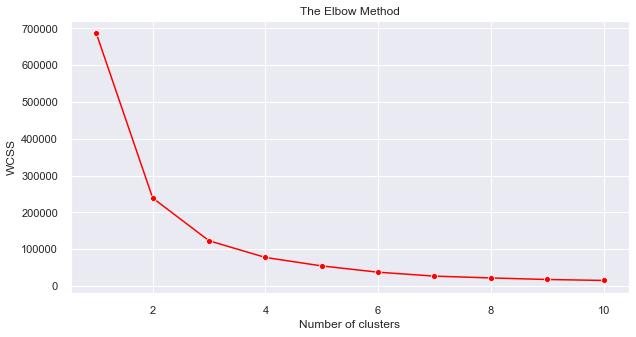

In [944]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [945]:
#scegliamo numero di clusters == 3

In [946]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(RK)

/Users/francescocrovella/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/francescocrovella/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/francescocrovella/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

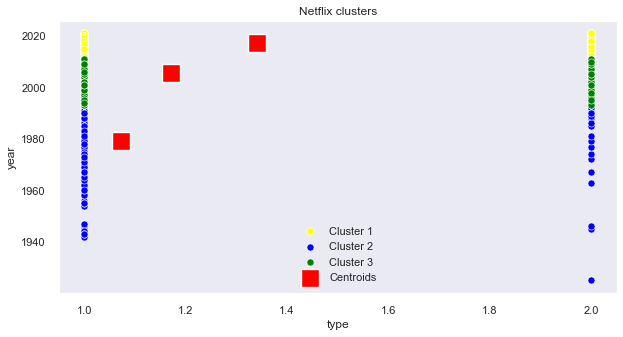

In [947]:
#Visualising the clusters
plt.figure(figsize=(10,5))
sns.scatterplot(RK[y_kmeans == 0, 0], RK[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(RK[y_kmeans == 1, 0], RK[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(RK[y_kmeans == 2, 0], RK[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red',label = 'Centroids',s=300,marker=',')

plt.grid(False)
plt.title('Netflix clusters')
plt.xlabel('type')
plt.ylabel('year')
plt.legend()
plt.show()

In [948]:
#questa clusterizzazione non ha portato a granche di buono, proviamo con'un altra clusterizzazione

In [949]:
rating_dataset='/Users/francescocrovella/Desktop/Entertainment/Netflix_Shows.csv'
rating_df_K=pd.read_csv(rating_dataset,encoding='latin-1')
rating_df_K.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [950]:
rating_df_K.dropna()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,95.0,80
...,...,...,...,...,...,...,...
984,The Magic School Bus,TV-Y,Suitable for all ages.,10,1997,81.0,80
986,PokÌ©mon: Indigo League,TV-Y,Suitable for all ages.,10,2000,74.0,80
988,Paddington,PG,mild action and rude humor,60,2014,70.0,80
991,Dawn of the Croods,TV-Y7,Suitable for children ages 7 and older,41,2017,72.0,80


In [951]:
rating_df_K['rating'].value_counts()

TV-14       234
PG          170
TV-MA       148
G           138
TV-Y         68
TV-PG        59
TV-G         52
TV-Y7-FV     44
TV-Y7        38
R            19
PG-13        15
NR           14
UR            1
Name: rating, dtype: int64

#queste sono le sostituzioni stringa int per abilitare il kmeans 

- TV-14       1
- PG          2
- TV-MA       3
- G           4
- TV-Y        5
- TV-PG       6
- TV-G        7
- TV-Y7-FV    8
- TV-Y7       9
- R           10
- PG-13       11
- NR          12
- UR          13

In [952]:
rating_df_K['rating']=rating_df_K['rating'].str.replace('-','')

In [953]:
rating_df_K.replace({'TV14': 1, 'PG': 2, 'TVMA': 3, 'G': 4, 'TVY': 5,'TVY': 5,'TVPG': 6,'TVG': 7,'TVY7FV': 8,'TVY7': 9,'R': 10,'PG13': 11,'NR': 12,'UR': 13}, inplace=True)

In [954]:
rating_df_K.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   rating             1000 non-null   int64  
 2   ratingLevel        941 non-null    object 
 3   ratingDescription  1000 non-null   int64  
 4   release year       1000 non-null   int64  
 5   user rating score  605 non-null    float64
 6   user rating size   1000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


In [955]:
rating_df_K['rating']=rating_df_K['rating'].astype(int)

In [956]:
rating_df_K.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,11,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,10,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,1,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,1,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,6,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [957]:
rating_df_K.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   rating             1000 non-null   int64  
 2   ratingLevel        941 non-null    object 
 3   ratingDescription  1000 non-null   int64  
 4   release year       1000 non-null   int64  
 5   user rating score  605 non-null    float64
 6   user rating size   1000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


In [958]:
RK1 = rating_df_K.iloc[:, [1,3]].values

In [963]:
wcss1 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(RK1)
    # inertia method returns wcss for that model
    wcss1.append(kmeans.inertia_)

/Users/francescocrovella/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


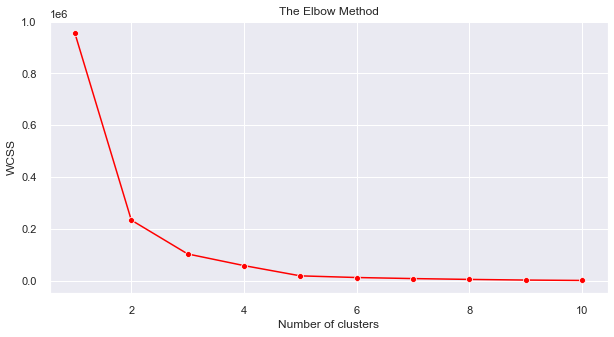

In [964]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss1,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#k da prendere == 3

In [965]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(RK1)

/Users/francescocrovella/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/francescocrovella/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/francescocrovella/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

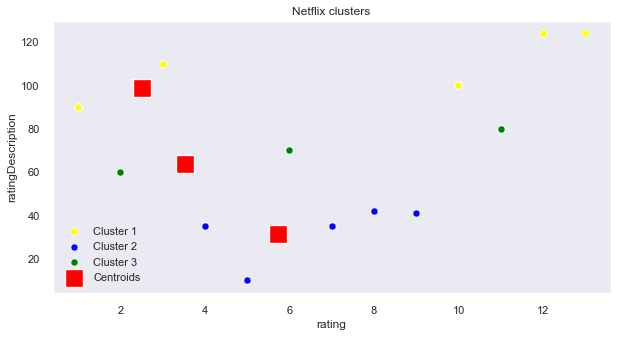

In [967]:
#Visualising the clusters
plt.figure(figsize=(10,5))
sns.scatterplot(RK1[y_kmeans == 0, 0], RK1[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(RK1[y_kmeans == 1, 0], RK1[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(RK1[y_kmeans == 2, 0], RK1[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red',label = 'Centroids',s=300,marker=',')

plt.grid(False)
plt.title('Netflix clusters')
plt.xlabel('rating')
plt.ylabel('ratingDescription')
plt.legend()
plt.show()

cluster1=contents TV14,PG,MA con rating maggiore superiore a 90

cluster2=contents che prende tutti i 13 tipi di contents (TV14 --> ) con rating intermedio che oscilla intorno a 60/70

cluster3=contents che prende i primi 9 tipi di contents con rating basso sotto al 40